<p></p>

# <center>Waves Phenomena/Fourier Methods</center>

## <center> Workshop 18</center>

# Fast Fourier Transforms using Python
 
**Reminder**: Use `matplotlib` and `numpy` Python modules for plotting and numerical calculations respectively.
Start your program with the following statement:

In [30]:
import matplotlib.pyplot as plt
import numpy as np

## Recap and introduction


A Fourier transform (FT) is used to calculate the frequency components
present in a signal that varies in time or the spatial frequencies
present in an image that varies in space.  In the lectures 
the Fourier transform and the inverse Fourier transform have been
defined as
$$ 
\begin{array}{rl} 
F(\omega) &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(t)
e^{-i\omega t} {\rm d} t \,, \\
 f(t) &=
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} F(\omega) e^{i\omega
t} {\rm d} \omega \,.
\end{array}
$$ 
The inverse FT takes the FT and recovers the original function.


We saw in *Fourier 9* that for a signal that has a finite number of points sampled at
discrete, evenly spaced intervals, we instead have the
Discrete Fourier Transform (DFT) and its inverse transform
$$ \begin{array}{rl} 
F_k &= \sum_{n=0}^{N-1} f_n e^{-i 2\pi n k /N}
\ \ \ \mathrm{ for } \ 0 \le k \le N-1 \,, \\
f_n &= \frac{1}{N} \sum_{k=0}^{N-1} F_k e^{ i 2\pi n k /N} \ \ 
\mathrm{for} \  0 \le n \le N-1 \,.
\end{array}
$$

If you have $N$ data points, $f_{n}$, separated by $\Delta t$, between $t=0$ and
  $(N-1)\Delta t$ (i.e. $t=n \Delta t$ with $n=0,...,N-1$) the
  discrete Fourier  transform has $N$ data points, $F_{k}$, corresponding to frequencies 
$\omega= k \Delta \omega$  with $k=0,...,N-1$ and $\Delta \omega=2 \pi/(N \Delta t)$.
The Nyquist frequency is defined as $\omega_{c}=
  \pi/\Delta t$,  and has $k=k_{\rm c}= N/2$. It determines the maximum frequency that you can detect in your signal.


The indices of a `numpy` array  must start at 0, so the first data point
$f_0$ is represented by the variable `f[1]`. Similarly the zero
frequency component of the DFT  $F_0$ is the variable `F[0]`. Therefore
the definitions of the DFT and inverse DFT in terms of `numpy` arrays
become


$$ \begin{array}{rl} 
{ \tt F[k]} &= { \tt \sum_{n=0}^{N-1} f(n)* np.
exp(-1j*2*\pi*k*n/N)}
\,, \\ 
{ \tt f[n]} &= { \tt 1/N*\sum_{k=0}^{N-1} F[k]* np.exp(1j*2*\pi*k*n/N)} \,.
\end{array}
$$ 

In Python's `numpy` array `F[0:N]` the element  `F[0]` contains the zero-frequency term. Then `F[1:N/2]` contains the positive-frequency terms, and `F[(N/2+1):]` contains the negative-frequency terms, in order of decreasingly negative frequency. For an even number of input points `N`, `F[N/2]` represents both positive and negative Nyquist frequency. For an odd number of input points `N`, `F[(N-1)/2]` contains the largest positive frequency, while `F[(N+1)/2]` contains the largest negative frequency.

The DFT will almost always be complex. Therefore
we usually need to plot the modulus or the modulus squared of the DFT (which is often referred to as the power spectrum).

Numerical techniques have been developed to calculate discrete Fourier
transforms. The most commonly used algorithm is
known as the Fast Fourier Transform or FFT. Here we will be using the
FFT without studying its inner workings[^1]. Python's  `numpy.fft` module has procedures for optimising the way it does the calculations depending on the size of the data sample. The original FFT algorithm was designed to work when the number of data points is equal to an integer power of 2.
Conventional wisdom therefore states that, in order for the FFT to be calculated quickly, you should use a number of data points that is an integer power of 2.  Very efficient FFT solvers have since
   been developed for powers of 3, 5 and 7. If the number of data points is a prime number, however, the calculation will be rather slow! 
   If you are going to be doing a lot of FFTs (for instance in project work) you
   should search for the most efficient value of $N$ by direct timing
   (i.e. varying $N$ and seeing how long your code takes to run).
 
[^1]: If you're interested in how it works, see Appendix 5.A of the Fourier summary notes or the chapter on FFTs in the *"Numerical methods in ..."* series of textbooks by Press et al.</span>

## The `numpy`'s FFT


The FFT of a vector  `x`  can be calculated simply  using the `numpy`'s function `fft.fft`:


The vector `y` is the discrete Fourier transform of the vector
`x`, computed using a fast Fourier transform algorithm. If `x`
is a matrix then `y` is the FFT of each column of the matrix.  If
a second parameter, `n`, is specified then `y` is the `n`-point
FFT, which means that `n` data points are used to calculate the 
transform. If `len(x)<n` then `np.fft.fft` pads `x` with trailing
zeros to reach a length of `n`. If `len(x)>n` then the
data is truncated to use only the first `n` points. If `x` is a multidimensional array, the paramater `axis` specifies the dimension along which the FFT is applied.

The inverse Fourier transform can be calculated using `np.fft.ifft` which  syntax is
identical to that of `np.fft.fft`.


### Question 1

i) Generate $0.6 \, {\rm s}$ of a signal which is equal to the sum of two sinusoids with frequencies
$50 \, {\rm Hz}$ and $120 \, {\rm Hz} $, sampled at a rate
$1000 \, {\rm Hz}$.  Plot the first fifty points of the signal using plt.step.

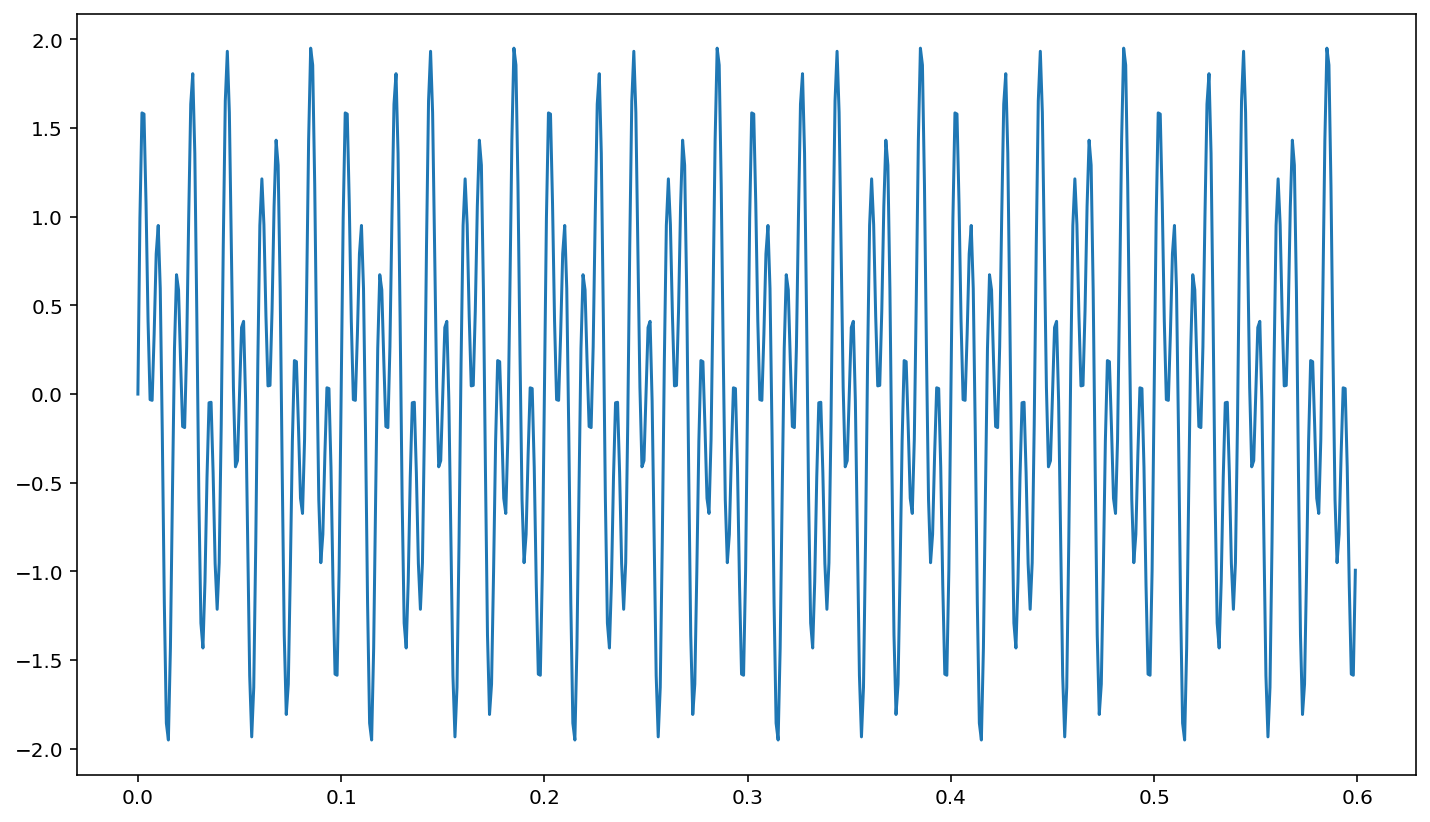

In [6]:
import numpy as np
import matplotlib.pyplot as plt
duration = 0.6
dt=0.001
timestamps=np.arange(0, duration, dt)
freq1=50
freq2=120
sin1=np.sin(2*np.pi*freq1*timestamps)
sin2=np.sin(2*np.pi*freq2*timestamps)
sintot=sin1+sin2
plt.plot(timestamps, sintot)


ii) Calculate the 512 point FFT of this signal and plot the
real part of the FFT versus array index. Notice that (as discussed in "Recap and Introduction" ) the data is
symmetric about the halfway point. All the useful frequency components are stored in the first 256 points. The last 256 points are a mirror image caused by the finite sampling frequency.


Text(0.5, 1.0, 'real part of FFT against index')

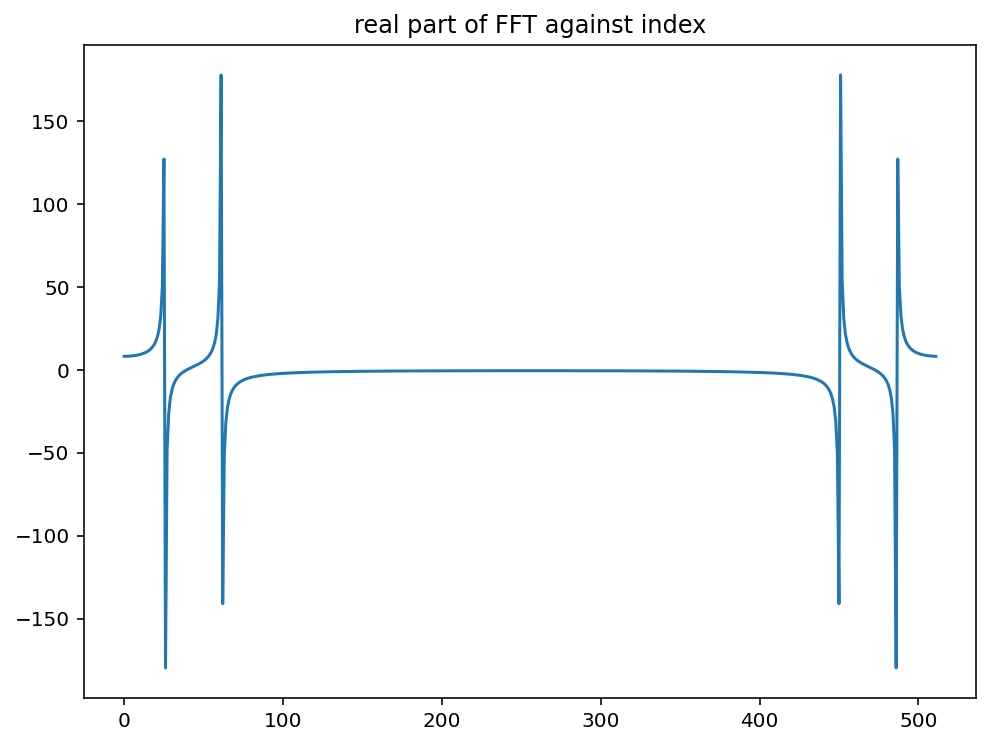

In [8]:
N=512
y=sintot
Ft=np.fft.fft(y, N)
RFt=np.real(Ft)
plt.figure(2,figsize=(8,6))
ax2=plt.axes()
vec=np.arange(0,512)
plt.plot(vec,RFt)
plt.title('real part of FFT against index')


iii) The power spectrum is a measurement of the energy at each
frequency. If `Y`  is the Fourier transform, then the power spectrum is defined as

`Pyy = np.real(Y*np.conj(Y)/N)`

where `np.conj(Y)` is the complex conjugate of `Y` and `N` is
the number of frequencies (which is equal to the number of data samples). Note that for plotting result of array multiplication should be recast as an array of real numbers.

We're going to plot the first 256 points of the power spectrum as a function of frequency.
The spacing of the angular frequencies making up the Fourier transform
is $\Delta \omega = 2 \pi/(N \Delta t)$. The spacing of the
frequencies, $f$, is therefore $\Delta f = 1/(N \Delta t )$. $\Delta t$, the
spacing of the data points, is equal to the inverse of the sampling rate,
which in this case is $1000 \, {\rm Hz}$. Therefore we want:

You should see that the power spectrum peaks at the input frequencies ($50 \, {\rm Hz}$ and
$120 \, {\rm Hz}$). 

Note that to increase frequency resolution (i.e. to see high frequency variations) you need lots of points in the FFT, since the sampling frequency
determines the maximum frequency that can be detected in the FFT.

### Question 2

i) Define and plot a vector that represents the light transmitted through  a 1d
slit (i.e. a top-hat aperture function). As mentioned above,
  it's a good idea to make $N$, the number of samples which your vector contains,  an integer power
  of 2.

ValueError: x and y must have same first dimension, but have shapes (2000,) and (990,)

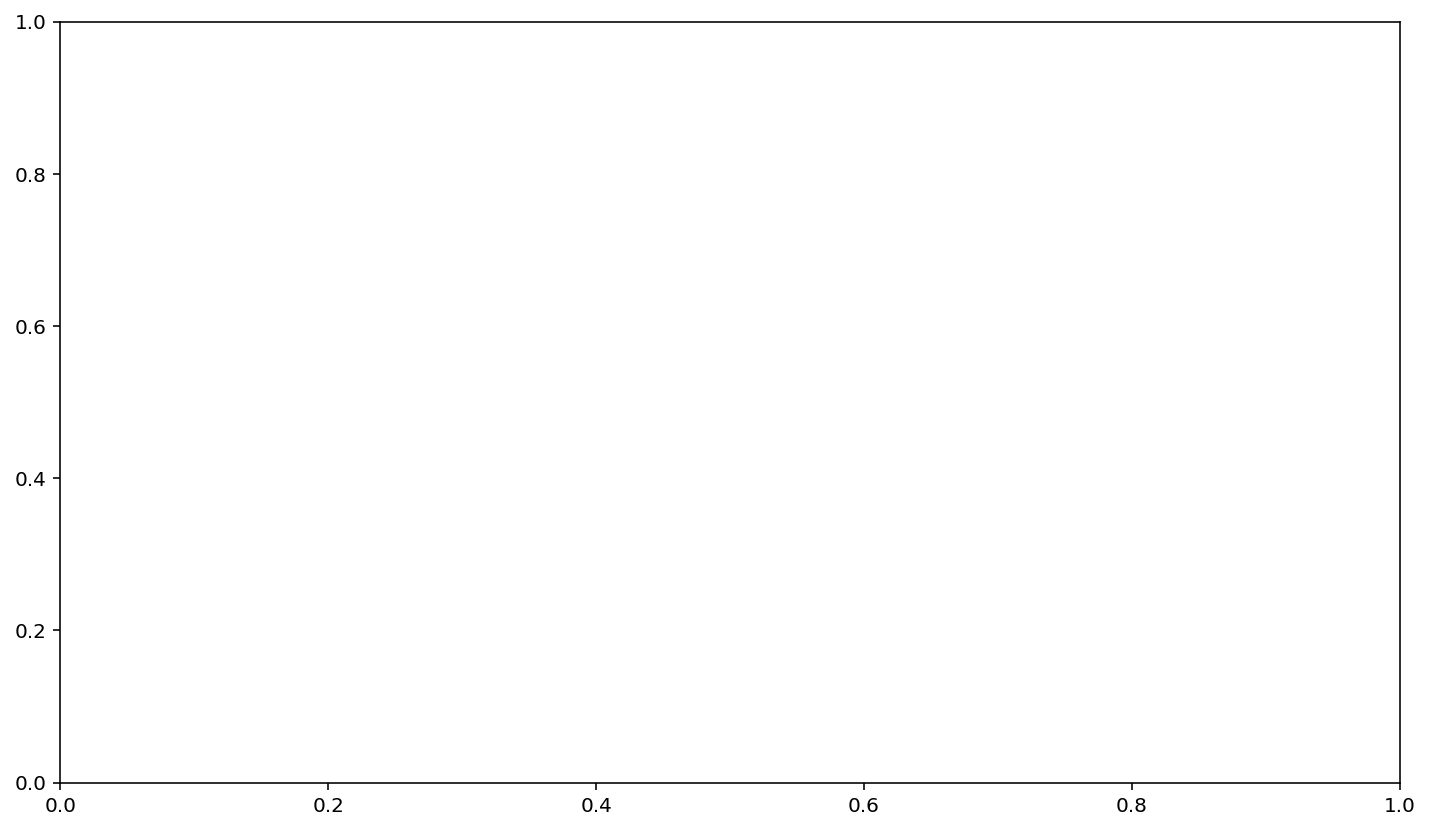

In [11]:
)'''
n=1

ii)  The Fraunhofer diffraction pattern is proportional to the square of the Fourier transform of the aperture function.

Use `np.fft.fft` to find the Fraunhofer diffraction pattern of your 1d slit and plot the result. It should be the square of a $\text{sinc}(x)$ function centred at zero spatial
frequency. 

In this case we're taking the Fourier transform of a spatial function (rather than a function of time), therefore the Fourier transform is a function of wavenumber or spatial frequency, $k$ (rather than angular frequency, $\omega$). In this case if $L$ is the spatial length of the vector, then the FFT will have $N$ equally spaced spatial frequencies  between $k=0$ and $k=2 \pi (N-1)/L$, where $N$ is the number of samples that your vector from part i) contains.

iii) The
command `np.fft.fftshift` reorganizes the FFT so that zero frequency is
placed in the centre of the vector rather than the first element.  Use
`np.fft.fftshift` and make a plot with the sinc function centred properly.  

You'll need to manually shift your vector of frequencies so that its centered at zero frequency too, i.e.:

where `L` is the length of your original vector representing the light transmitted through a 1d slit.

iv) Change the width of the top hat function and see
how the width of the sinc function changes. You should find that a wider
slit leads to a narrower sinc function.

## Convolution

We saw in *Fourier 8* that mathematically the convolution of two functions $f(x)$ and $g(x)$ is
defined as
$$h(x^{\prime}) = \int_{-\infty}^{\infty} f(x) g(x^{\prime}-x) {\rm d} x \,.$$ 
This can be used to model the situation where an intrinsic signal is
'blurred' by some aspect of the measurement process.  If the intrinsic
signal is a set of delta functions, but the measuring instrument has a
response that is gaussian, the result will be the sum of gaussians centred at
the positions of the delta functions.  The intuitive interpretation of convolution
is that if one function is slid across the other, then at each
position the convolution is the area under the product of the
functions.

With discrete data the
convolution becomes a sum: $$ h(k) = \sum_j f(j) g(k-j),$$ where the
sum extends over all valid indices.

<center><img src="convolution.png" alt="drawing" width="800"/></center>

The diagram schematically shows the process of convolving three
delta-functions (solid lines) with a gaussian (the dotted line).  The left column shows the two functions and the right column their convolution.
The top panels show the gaussian positioned at the leftmost offset, where
just one point overlaps. As the gaussian is moved to the right more
points overlap, so the sum extends over the points between the `o` and
the `x`. When the gaussian passes over the delta-functions, the
convolution is large. Elsewhere it is small. The last point is when
the gaussian is at the furthest right, with just one point
overlapping. 
You can see from this that the convolved array is bigger than the
individual arrays. If the original arrays have `N` points, then the
convolved array will have `2*N-1`  points. In practice we are
usually interested in the central `N` points of the convolved
array.


The Python function to convolve two functions is `np.convolve` . This
function requires a vector for $f$ and another for $g$, and returns
a vector $h$ which has elements `h[k]`.

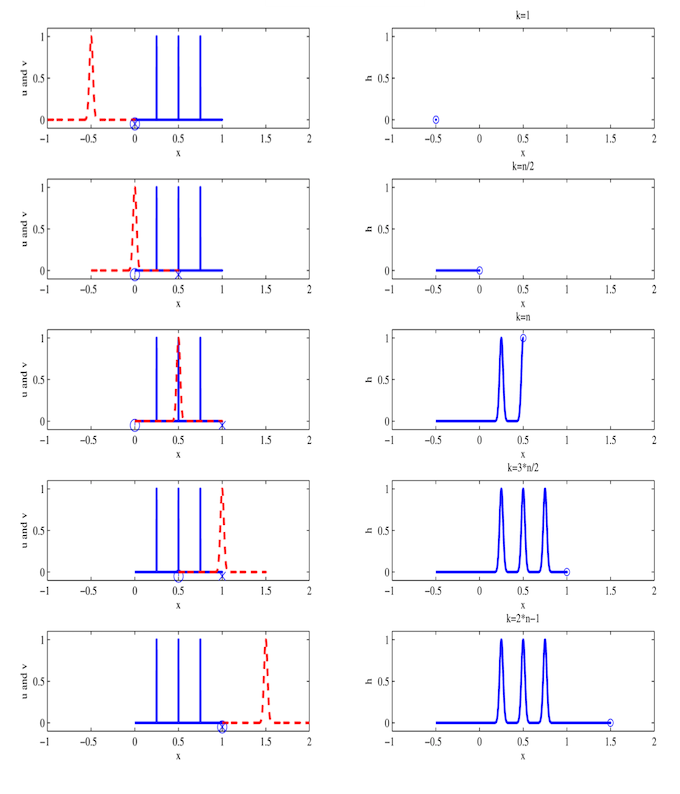

### Question 3

i) Generate and plot $10 \, {\rm s}$ of a signal sampled at $100 \,
{\rm Hz}$ so that the
signal is zero everywhere, except for three points at time $t=2.5,
5.0$ and $7.5 \, {\rm s}$ which are set to $1$. This is the numerical equivalent to
three delta-functions.

Also generate a gaussian with
$\sigma = 0.1 \, {\rm s}$ for $t$ between $-5 \, {\rm s}$ and $+5 \, {\rm s}$ using the same time
steps.


In [0]:
t=10s
dt=0.01
f=np.zeros((t*dt))
f[np.array([250,500,750])]=1
s=0.1
g=np.exp((-t1**2)/(2*s**2))


ii) Use the `np.convolve`  function to calculate the convolution of the
delta-function signal and the gaussian. The `np.convolve`  function does the entire set of
summations for all values of $k$ in one go, and returns an
array containing the convolved function $h$. Plot the convolution.

In [0]:
convf=np.covolve(f)
plt.plot(f, convf)

## Convolution Theorem

The convolution theorem says that the Fourier transform of the
convolution of $f$ and $g$ is the product of the Fourier transforms of
$f$ and $g$. For discrete FTs $FT[h] = FT[f] FT[g]$ and so $h = IFT[ FT[f] FT[g]]
$. 

Calculating FTs and IFTs is quicker than calculating a convolution directly. Therefore we can use the convolution theorem (and `np.fft.fft`  and `np.fft.ifft` to efficiently calculate a convolution.


### Question 4

i) Use `np.fft.fft` and `np.fft.ifft` to calculate the convolution of the
delta-function signal and gaussian from  Question 3,  and compare with the result you found 
 in Question 3 using `np.convolve` . 

Remember that `np.fft.fft`  returns an array with the zero frequency component of the FT as the first
 element. The  `np.convolve` function returns an array with the zero frequency component in the
 middle. Therefore to compare your results you'll need to use the `np.fft.fftshift` command as in Question 2iii).


## Two dimensional Fourier Transforms 

In the previous sections you calculated some 1d Fourier transforms
by generating 1d vectors of data and using the `np.fft.fft` 
command. In this section we will extend this to 2d data.  The 
command to calculate a 2d FFT is `np.fft.fft2` , and for the 2d inverse
transform `np.fft.fft2` .





work in exactly the same way as `np.fft.fft` and `np.fft.ifft`, but on a
two-dimensional matrix rather than a vector. 

There are also Fourier transform commands for data that is in three or
more dimensional arrays. The commands are  `np.fft.fftn` and `np.fft.ifftn` where `n` the number of dimensions. 


### Question 5

i) Create a 2d matrix that represents the intensity of light passing
through a square aperture, and calculate the resulting Fraunhofer diffraction pattern
(c.f. Question 2). 

ii) Plot the intensity of the 
diffraction pattern using `plt.imshow`.  You can show low
level detail as well as the main peak by plotting the logarithm of
one plus the intensity.

 ...]

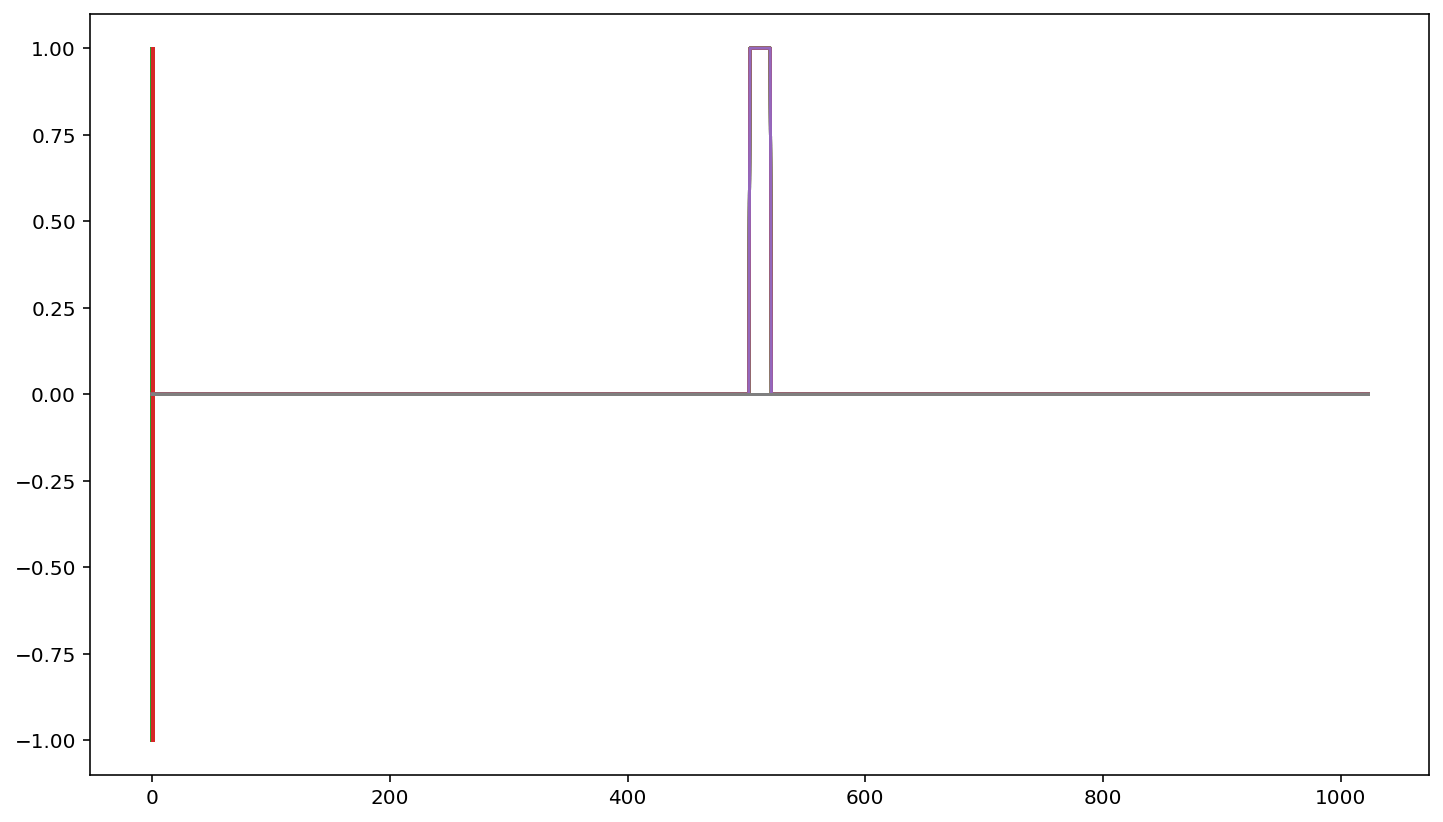

In [15]:
n=1024
L=2
x=np.linspace(-L/2, L/2, n)
y=np.linspace(-L/2, L/2, n)
[xx, yy]=np.meshgrid(x,y)
a=0.018
light=np.where((np.abs(xx)<a) & (np.abs(yy)<a),1,0)
plt.plot(xx, yy, light)